In [1]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape
X_test.shape


(10000, 28, 28)

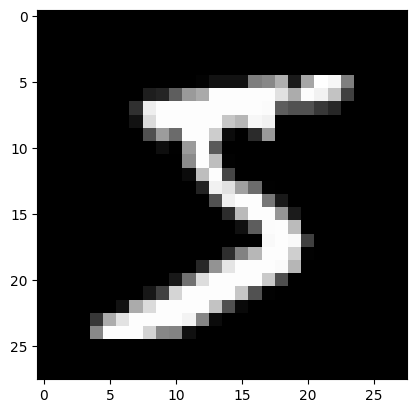

In [4]:
single_image= X_train[0]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [5]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [6]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [7]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [8]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32))
model.add(layers.Dense(10,activation="softmax"))

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [10]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 43s 44ms/step - loss: 0.1895 - accuracy: 0.9439 - val_loss: 0.0756 - val_accuracy: 0.9761
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0527 - val_accuracy: 0.9822
Epoch 3/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0455 - val_accuracy: 0.9853
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0504 - val_accuracy: 0.9844
Epoch 5/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0557 - val_accuracy: 0.9831


In [11]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

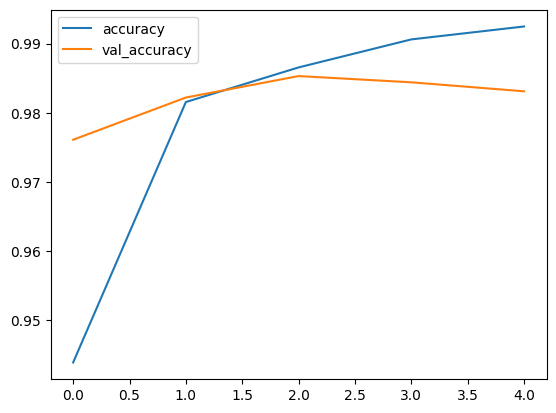

In [12]:
metrics[['accuracy','val_accuracy']].plot()

In [13]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [14]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    1    0    0    0    1    0    2    0    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   3    3 1009    0    2    0    1   13    1    0]
 [   0    0    2  997    0    2    0    7    2    0]
 [   0    0    2    0  976    0    0    1    0    3]
 [   2    0    1    7    0  878    3    0    0    1]
 [   8    3    1    1    6    1  935    0    3    0]
 [   0    3    2    0    0    0    0 1022    1    0]
 [   7    2    3    1    4    1    1   12  935    8]
 [   2    2    0    2   15    0    0   15    1  972]]


In [15]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
img = image.load_img('d1.jpeg')

In [19]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

1/1 [==============================] - 0s 38ms/step
[2]


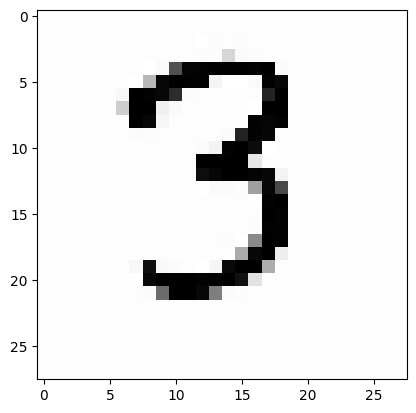

In [20]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')